<a href="https://colab.research.google.com/github/Ajay-Sai-Kiran/Machine_learning_challenge/blob/main/Day_V_of_Machine_Learning%5BDecision_Tree%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree

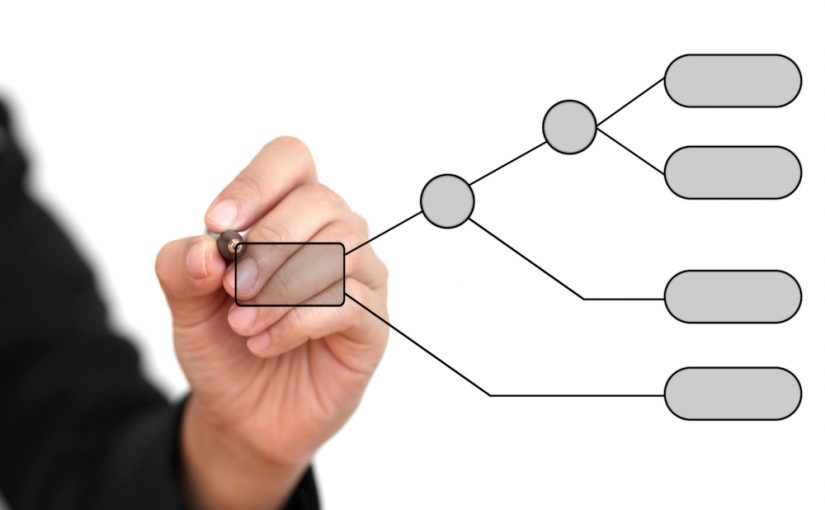

#Tree algorithms: ID3, C4.5, C5.0 and CART

What are all the **various decision tree algorithms** and how do they **differ** from each other?

**ID3 (Iterative Dichotomiser 3)**

It was developed in 1986 by Ross Quinlan. 

The algorithm **creates a multiway tree**, finding for each node (i.e. in a greedy manner) the **categorical feature that will yield the largest information gain for categorical targets**.**Trees are grown** to their **maximum size** and then a **pruning step is usually applied to improve the ability of the tree** to generalise to unseen data.

**C4.5 is the successor to ID3 and removed the restriction** that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. 


C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

**C5.0** is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

**CART (Classification and Regression Trees)** is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

#What is Decision Tree how it will work?


**Decision Trees (DTs)** are a **non-parametric supervised learning method** used for **classification and regression**. 

The **goal** is to **create** a model that predicts the value of a **target variable** by learning **simple decision rules inferred** from the **data features**. A tree can be seen as a piecewise constant approximation.

There are 2 nodes, which are called the **Decision node** and **Leaf Node**. 

The **Decision node is used to make decisions** and also the **Leaf node is that the output.**

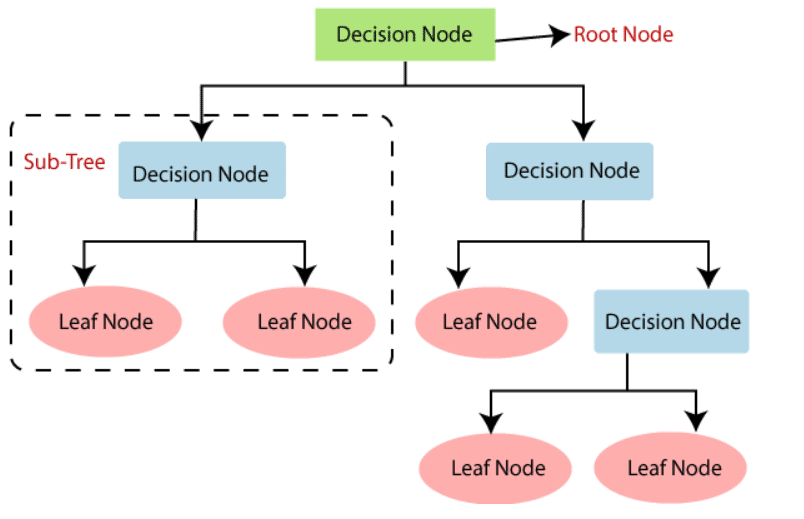

It is known as a **selection tree** as a result of its near sort of a tree, it starts with the fundamental node, that expands on additional branches and constructs a tree-like structure.

#The CART Training Algorithm

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees (also called “growing” trees). The idea is really quite simple: the algorithm first splits the training set in two subsets using a single feature k and a threshold tk.

How does it choose k and tk? 

It searches for the
pair (k, tk) that produces the purest subsets (weighted by their size). The cost function that the algorithm tries to minimize is


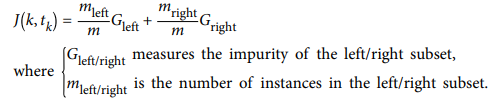

Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, **recursively**. 

It **stops** recursing **once it reaches the maximum depth** (**defined by the max_depth hyperparameter**), or **if it cannot find a split that will reduce impurity.**

 A few other **hyperparameters** **control** additional **stopping** conditions**(min_samples_split, min_samples_leaf, min_weight_fraction_leaf, and max_leaf_nodes)**.

The **CART algorithm** is a **greedy algorithm**: it greedily **searches** for **an optimum split** at the top level, then repeats the
process at each level. 

It does not check whether or not the split will lead to the lowest possible impurity several levels down. **A greedy algorithm often produces a reasonably good solution**, but it is **not guaranteed to be the optimal solution**.


Unfortunately, finding the optimal tree is known to be an NP Complete problem:
it requires O(exp(m)) time, making the problem intractable even for fairly small training sets. This is why we must settle for a “reasonably good” solution.

#Making Predictions

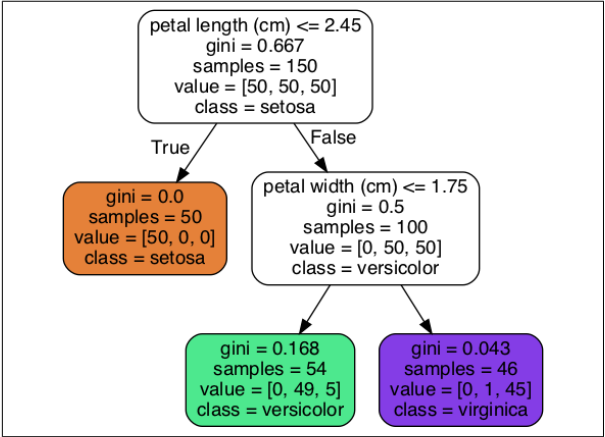

Let’s see how the tree represented in the above figure makes the predictions.



Suppose you find an iris flower and you want to classify it. You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is,then you move down to the root’s left child node (depth 1, left). 


In this case, it is a leaf node (i.e., it does not have any children nodes), so it does not ask any questions: you can simply look at the predicted class for that node and the Decision Tree predicts that your flower is an Iris-Setosa (class=setosa).

Now suppose you find another flower, but this time the petal length is greater than 2.45 cm. You must move down to the root’s right child node (depth 1, right), which is not a leaf node, so it asks another question: is the petal width smaller than 1.75 cm? 


If it is, then your flower is most likely an Iris-Versicolor (depth 2, left). If not, it is likely an Iris-Virginica (depth 2, right).

One of the **many qualities of Decision Trees** is that they require
**very little data preparation**. 

In particular, **they don’t require** **feature  scaling or centering at all**.


A node’s samples attribute counts how many training instances it applies to. 

For example, 100 training instances have a petal length greater than 2.45 cm (depth 1,right), among which 54 have a petal width smaller than 1.75 cm (depth 2, left)

A node’s value attribute tells you how many training instances of each class this node applies to: for example, the bottom-right node applies to 0 Iris-Setosa, 1 IrisVersicolor, and 45 Iris-Virginica. 


Finally, a node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class. 

#Gini impurity


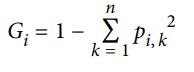

pi,k is the ratio of class k instances among the training instances in the i
th node.

##Gini Impurity or Entropy?

By default, the **Gini impurity measure** is used, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy".

The concept of entropy originated in thermodynamics as a measure of molecular disorder: entropy approaches zero when molecules are still and well ordered.

In Machine Learning, it is frequently used as an impurity measure: a set’s entropy is zero when it contains instances of only one class.

A **reduction of entropy** is often called an **information gain**

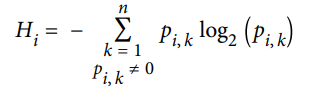

Credits:https://sebastianraschka.com/faq/docs/decision-tree-binary.html

So should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. 

Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees

#Estimating Class Probabilities

A **Decision Tree** can also **estimate the probability** that an **instance belongs to a particular class k**: first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node.

For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54),and 9.3% for Iris-Virginica (5/54). 

And of course if you ask it to predict the class, it should output Iris-Versicolor (class 1) since it has the highest probability. 

#Decision Tree Terminologies

Credits:https://k21academy.com/author/mohit/

**Root Node:** the foundation node is wherever the choice tree starts. It represents the whole dataset, that additional gets divided into 2 or a lot of homogenized sets.


**Leaf Node:** Leaf nodes are the end **output node**.


**Splitting:** rending is the **method of dividing the choice node or root node into sub-nodes.**


**Branch/Sub Tree:** A tree **fashioned by rending the tree.**


**Pruning:** **Pruning** is the method of **removing** the **unwanted branches from the tree.**


**Parent/Child node:** The **root node of the tree** is named the **parent node**, and **different nodes are known as the kid nodes**.

#Regularization Hyperparameters

If left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely overfitting it.

Such a model is often called a nonparametric model, not because it does not have any parameters (it often has a lot) but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data.

In contrast, a parametric model such as a linear model
has a predetermined number of parameters, so its degree of freedom is limited,
reducing the risk of overfitting (but increasing the risk of underfitting)

#Maximum depth of the Decision Tree

In Scikit-Learn, this is controlled by the
max_depth hyperparameter (the default value is None, which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting.


**min_samples_split** (the minimum number of sam‐
ples a node must have before it can be split).

**min_samples_leaf** (the minimum number of samples a leaf node must have).

**min_weight_fraction_leaf** (same as
min_samples_leaf but expressed as a fraction of the total number of weighted instances)

 **max_leaf_nodes** (maximum number of leaf nodes)

 **max_features**
(maximum number of features that are evaluated for splitting at each node). **Increasing**  **min_hyperparameters** or **reducing**  **max_hyperparameters** will **regularize the model**

Other algorithms work by first training the Decision Tree without
restrictions, then **pruning (deleting)** unnecessary nodes. A node
whose children are all leaf nodes is considered unnecessary if the
purity improvement it provides is not statistically significant. Standard statistical tests, such as the χ
2
test, are used to estimate the
probability that the improvement is purely the result of chance
(which is called the null hypothesis).

#Regression

Decision Trees are also capable of performing regression tasks. 

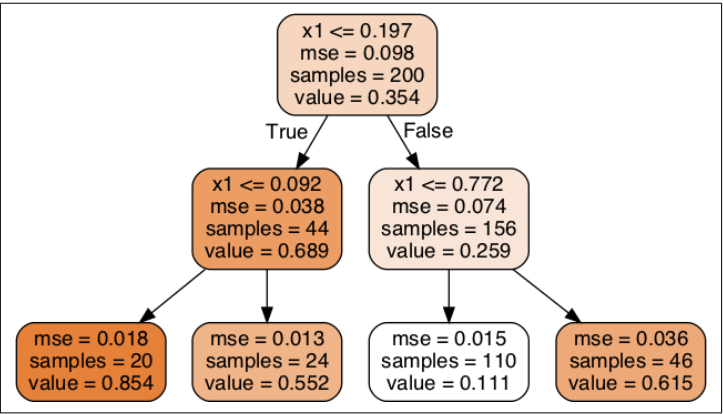

This tree looks very similar to the **classification tree**. The main difference is that instead of **predicting a class in each node** , **it predicts a value.**




The CART algorithm works mostly the same way as earlier, except that **instead of** trying to split the training set in a way that **minimizes impurity**, it now **tries to split** the
training set in a way that  **minimizes the MSE**

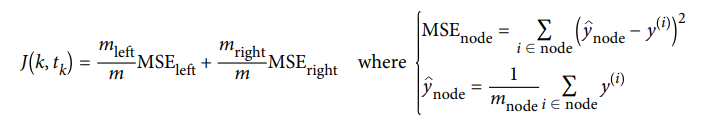

Just like for classification tasks, Decision Trees are prone to overfitting when dealing
with regression tasks. Without any regularization.

#Advantages and Disadvantages of Decision Trees

#Advantages

1.Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.

2.A decision tree does not require normalization of data.

3.A decision tree does not require scaling of data as well.

4.Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.

5.A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

#Disadvantage

1.A small change in the data can cause a large change in the structure of the decision tree causing instability.


2.For a Decision tree sometimes calculation can go far more complex compared to other algorithms.

3.Decision tree often involves higher time to train the model.

4.Decision tree training is relatively expensive as the complexity and time has taken are more.

5.The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.